# ***Problem statement: ***The goal is to understand the relationship between house features and how these variables affect the house price. Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model.

# Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from io import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Loading Dataset.

In [2]:
df = pd.read_excel('/content/drive/MyDrive/dataset/DS - Assignment Part 1 data set.xlsx')
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


# Data Sanity.

In [3]:
'''Getting Basic Information about the given dataset'''

print('The basic information about the given data is as follows : \n')

df.info()

The basic information about the given data is as follows : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


We can see that variable name 'Transaction date', 'House Age', 'Distance from nearest Metro station (km)', 'latitude', 'longitude' and 'House price of unit area' has datatype 'Float64' whereas variable name  'Number of convenience stores', 'Number of bedrooms', 'House size (sqft)' has datatype 'int64'.

In [4]:
'''Getting the idea of number of rows and columns'''

print(f'The shape of above dataset is : {df.shape} \n')

print(f'The rows of above dataset is : {df.shape[0]} \n')

print(f'The columns of above dataset is : {df.shape[1]} \n')

The shape of above dataset is : (414, 9) 

The rows of above dataset is : 414 

The columns of above dataset is : 9 



In [5]:
'''Checking for null values if any'''

print('Total number of null values in follow data is : \n')

df.isnull().sum()

Total number of null values in follow data is : 



Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

There is no null value in the dataset.

In [6]:
'''Getting statistical Information about the given dataset'''

print('The statistical information about the given data is as follows : \n')

df.describe()

The statistical information about the given data is as follows : 



,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


# Data Visualization

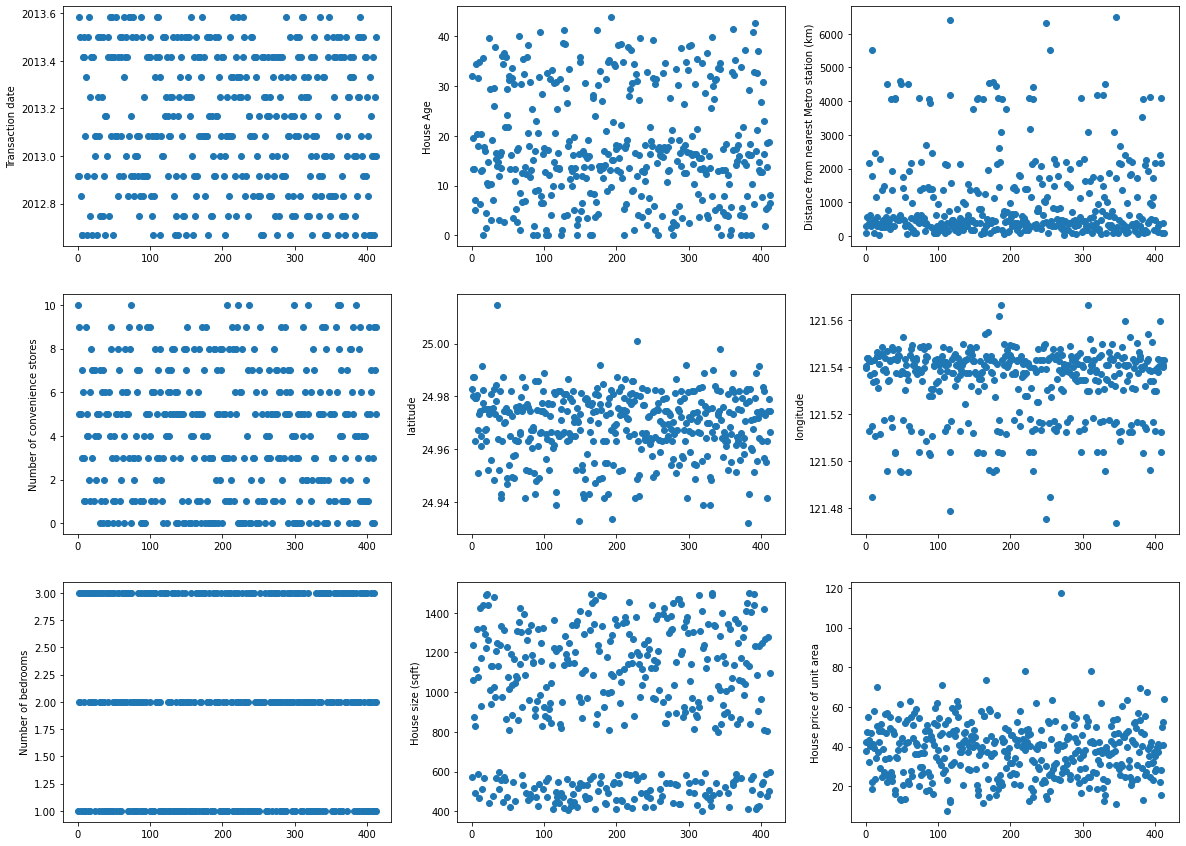

In [7]:
numeric_columns = df.select_dtypes(include=np.number)
col_names = list(numeric_columns)

column_index = 0
rows = 3
columns = 3

fig, ax = plt.subplots(ncols=columns, nrows=rows, figsize=(20,15),squeeze=False)

for i in range(rows):
    for j in range(columns):
        ax[i][j].scatter(x = df.index, y = numeric_columns[col_names[column_index]])
        ax[i][j].set_ylabel(col_names[column_index])
        column_index += 1

we can see that variable name 'Distance from nearest Metro station (km)', 'longitude', 'latitude' and 'House price of unit area' has outliers.

In [8]:
'''Creating function to drop outliers from data sets'''

def outliers(df):
  Q1 = np.percentile(df,25)
  Q3 = np.percentile(df,75)
  IQR = Q3 - Q1
  outliers = df[((df < (Q1 - (1.5*IQR))) | (df > (Q3 + (1.5*IQR))))]
  return outliers


def outlier(df):
  Q1 = np.percentile(df,25)
  Q3 = np.percentile(df,75)
  IQR = Q3 - Q1
  outliers = df[(df > (Q3 + (1.5*IQR)))]
  return outliers

In [9]:
'''Droping out the outliers using function crearted '''

df.drop(outliers(df['House price of unit area']).index,inplace=True)
df.drop(outliers(df['longitude']).index,inplace=True)
df.drop(outliers(df['latitude']).index,inplace=True)
df.drop(outlier(df['Distance from nearest Metro station (km)']).index,inplace=True)

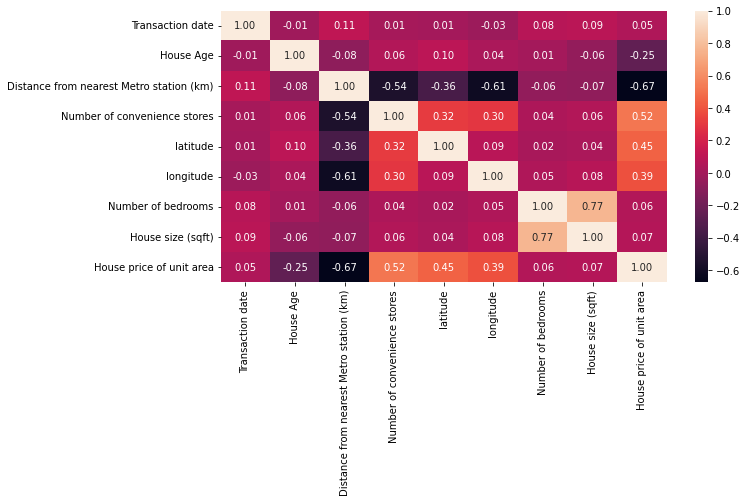

In [10]:
'''Data Visualization to see whether features are related to each other or not'''

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

We can see by above visualization that variable name 'Number of bedrooms' and 'House size' are highly correlated but decision of not including it as deciding factor will be taken using variance inflation factor.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
'''creating dataframe using above columns and calculating vif'''

x = df.drop('House price of unit area',axis=1)
vif_df = pd.DataFrame()
vif_df['features'] = x.columns    #creating variable features having value as list of column
vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  #creating variable vif having calculated vif for each independent variable

print(vif_df)

                                   features           VIF
0                          Transaction date  4.678776e+07
1                                 House Age  3.255614e+00
2  Distance from nearest Metro station (km)  3.981682e+00
3              Number of convenience stores  5.376906e+00
4                                  latitude  7.392165e+06
5                                 longitude  4.736412e+07
6                        Number of bedrooms  1.659082e+01
7                         House size (sqft)  1.988170e+01


we can see that variable name 'Number of convenience stores', 'latitude' has vif value more than 5. Hence will try to remove one by one variable.

In [13]:
x = df.drop(['House price of unit area','latitude'],axis=1)
vif_df = pd.DataFrame()
vif_df['features'] = x.columns    #creating variable features having value as list of column
vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  #creating variable vif having calculated vif for each independent variable

print(vif_df)

                                   features           VIF
0                          Transaction date  4.522317e+07
1                                 House Age  3.237153e+00
2  Distance from nearest Metro station (km)  3.874809e+00
3              Number of convenience stores  5.269135e+00
4                                 longitude  4.520940e+07
5                        Number of bedrooms  1.658759e+01
6                         House size (sqft)  1.988114e+01


In [14]:
x = df.drop(['House price of unit area','latitude','Number of convenience stores'],axis=1)
vif_df = pd.DataFrame()
vif_df['features'] = x.columns    #creating variable features having value as list of column
vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]  #creating variable vif having calculated vif for each independent variable

print(vif_df)

                                   features           VIF
0                          Transaction date  4.473690e+07
1                                 House Age  3.234768e+00
2  Distance from nearest Metro station (km)  2.774451e+00
3                                 longitude  4.472682e+07
4                        Number of bedrooms  1.657843e+01
5                         House size (sqft)  1.986034e+01


# Extracting Target(y) and Feature(x) variable.

In [15]:
x = df.drop(['House price of unit area','latitude','Number of convenience stores'], axis=1)
y = df['House price of unit area']

# Splitting train and test data.

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=123)

In [17]:
'''checking shape of train and test variable'''

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((255, 6), (110, 6), (255,), (110,))

# Model 1 : Training Model using Linear Regression.

In [18]:
LR_model = LinearRegression()
LR_model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
w0 = LR_model.intercept_

print(f'The intercept is found to be {w0}')

The intercept is found to be -7182.767498437526


In [20]:
w1 = LR_model.coef_

print(f'The regression coeff is found to be {w1[0]}')

The regression coeff is found to be 5.561752413409339


In [21]:
'''Predicting the Target variable and then comparing with Actual Target one'''

yPredicted = LR_model.predict(xtest)

pd.DataFrame({'Actual': ytest, 'Predicted' : yPredicted})

,Actual,Predicted
68,36.2,40.391615
354,30.1,34.340096
10,41.4,37.392461
341,37.0,39.548604
278,44.0,49.812727
...,...,...
137,47.4,47.480797
173,35.1,35.459242
121,48.0,45.400635
5,32.1,22.245910


In [22]:
print(f'The accuracy of Linear Regression model is found to be : {r2_score(ytest,yPredicted)}')

The accuracy of Linear Regression model is found to be : 0.5606486654505689


# Model 2 : Training Model using Decision Tree

In [23]:
dt_model2 = DecisionTreeRegressor(max_depth = 2, random_state=12)
dt_model2.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=2, random_state=12)

In [24]:
dt_tree2 = DecisionTreeRegressor(random_state=1, max_depth=2, min_samples_split= 12)  #using max_depth 2
dt_tree2.fit(xtrain,ytrain)
dt_tree2_train_score = dt_tree2.score(xtrain,ytrain)
dt_tree2_test_score = dt_tree2.score(xtest,ytest)

print(f'Training Score is : {dt_tree2_train_score}')
print(f'Testing Score is : {dt_tree2_test_score}')

Training Score is : 0.5972656112874115
Testing Score is : 0.5970991969717883


In [25]:
dt_tree3 = DecisionTreeRegressor(random_state=1, max_depth=3, min_samples_split= 12)        #using max_dept 3
dt_tree3.fit(xtrain,ytrain)
dt_tree3_train_score = dt_tree3.score(xtrain,ytrain)
dt_tree3_test_score = dt_tree3.score(xtest,ytest)

print(f'Training Score is : {dt_tree3_train_score}')
print(f'Testing Score is : {dt_tree3_test_score}')

Training Score is : 0.6841995367912841
Testing Score is : 0.4168381712697382


With reference to above score we can say that Model with max depth 2 can be used for training and predicting the target as train and test score is almost similar.

Decision Tree Graphically Visualization of dt_tree2 : 


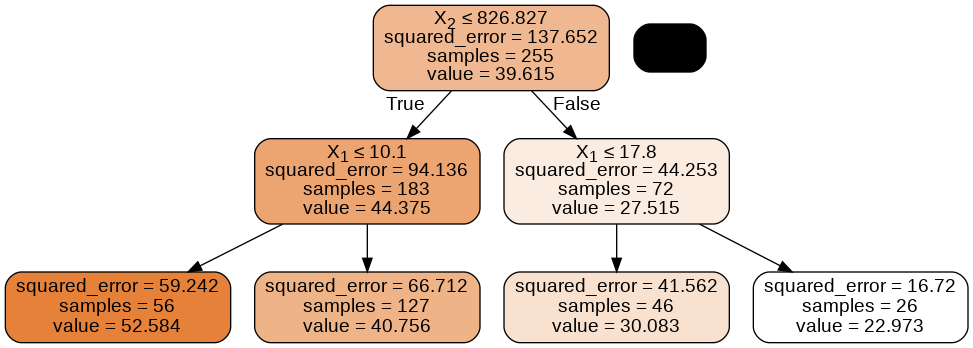

<Figure size 720x576 with 0 Axes>

In [26]:
print('Decision Tree Graphically Visualization of dt_tree2 : ')

from IPython.display import Image 
import pydotplus

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_tree2,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [27]:
dt_tree2_predicted = dt_tree2.predict(xtest)
pd.DataFrame({'Actual': ytest, 'Predicted' : dt_tree2_predicted})

,Actual,Predicted
68,36.2,40.755906
354,30.1,30.082609
10,41.4,40.755906
341,37.0,40.755906
278,44.0,52.583929
...,...,...
137,47.4,40.755906
173,35.1,40.755906
121,48.0,40.755906
5,32.1,30.082609


# Model 3 : Training Model using ADABOOST Regressor

In [28]:
dt_model = DecisionTreeRegressor()

parameter = {'max_depth' : [1,2,3],                     #define parameter which is used for gridsearchcv
            'min_samples_split':[2,3,4],
            'max_features' : [None,'auto','sqrt']}

grid_model = GridSearchCV(estimator=dt_model,param_grid=parameter,cv=5,return_train_score=True,scoring='neg_mean_absolute_error') 

In [29]:
grid_model.fit(xtrain,ytrain)  #fitting model using gridsearchcv

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3],
                         'max_features': [None, 'auto', 'sqrt'],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [30]:
print('Best parameter using GridsearchCV is : \n')

grid_model.best_params_

Best parameter using GridsearchCV is : 



{'max_depth': 3, 'max_features': None, 'min_samples_split': 3}

In [31]:
print('Best score using GridsearchCV is : \n')

grid_model.best_score_

Best score using GridsearchCV is : 



-5.790344212646558

In [32]:
print('Parameters combn using GridSearchCV  : \n')

grid_model.cv_results_['params']

Parameters combn using GridSearchCV  : 



[{'max_depth': 1, 'max_features': None, 'min_samples_split': 2},
 {'max_depth': 1, 'max_features': None, 'min_samples_split': 3},
 {'max_depth': 1, 'max_features': None, 'min_samples_split': 4},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 3},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 4},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 3},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 4},
 {'max_depth': 2, 'max_features': None, 'min_samples_split': 2},
 {'max_depth': 2, 'max_features': None, 'min_samples_split': 3},
 {'max_depth': 2, 'max_features': None, 'min_samples_split': 4},
 {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2},
 {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 3},
 {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 4},
 {'max_

In [33]:
'''Training model using best combination'''

dt_tree = DecisionTreeRegressor(random_state=1, max_depth=2, min_samples_split= 2, max_features='auto')
dt_tree.fit(xtrain,ytrain)
dt_tree_train_score = dt_tree.score(xtrain,ytrain)
dt_tree_test_score = dt_tree.score(xtest,ytest)

print(f'Training Score is : {dt_tree_train_score}')
print(f'Testing Score is : {dt_tree_test_score}')

Training Score is : 0.5972656112874115
Testing Score is : 0.5970991969717883


Hence we can conclude that Decision tree or ADABOOST regressor can be best model to used to predict the target variable name "House price of unit area".